<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/MLP_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data1 = pd.read_csv(os.path.join(path,'df_1.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

## hyperparameter

In [ ]:
def hyperParameter(data):
  y = data['telomere length (kb)']
  X = data.drop('telomere length (kb)',1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)
  param_grid = {
    'hidden_layer_sizes': [(10,),(20,),(50,),(60),(70,),(100,),(120,)],
    'max_iter': [200,400,600,800,1000],
    'activation': ['tanh', 'relu','identify','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],

    'random_state':[216]
  }
  model = MLPRegressor()

  gsearch = GridSearchCV(estimator = model,
                           param_grid = param_grid                    
                          )

  gsearch.fit(X_train,y_train)

  return gsearch.best_params_

# data1

In [ ]:
data1.drop('Unnamed: 0',1,inplace = True)
data1

<ipython-input-4-f170cadba2e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1.drop('Unnamed: 0',1,inplace = True)


,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200000,156.000000,19.40,112.000,64.00,70.00,19.741,13.631,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000,7.30
1,2.0,57.0,47.400000,153.000000,20.20,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000,6.36
2,2.0,24.0,53.200000,157.000000,21.60,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000,9.71
3,2.0,62.0,54.400000,165.000000,20.00,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000,6.17
4,2.0,86.0,49.000000,154.000000,20.70,129.000,79.00,83.00,19.907,15.369,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,47.000000,165.000000,17.30,104.000,63.00,89.00,20.387,12.852,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.393333,8.98
418,2.0,31.0,72.200000,168.000000,25.60,123.000,89.00,69.00,25.451,18.258,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.186667,8.23
419,2.0,32.0,54.500000,158.466667,21.68,113.160,71.83,72.30,22.707,21.599,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.486667,8.79
420,1.0,29.0,63.073333,168.866667,22.04,108.465,71.96,83.95,27.607,20.258,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,4.973333,8.93


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data1)

In [ ]:
df = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])
df

In [ ]:
y = df['telomere length (kb)']
X = df.drop('telomere length (kb)',1)

<ipython-input-69-2081a7e829a9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100,),activation = 'relu',solver = 'adam', random_state=216)
model.fit(X_train, y_train)

MLPRegressor(random_state=216)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: 0.8960934316316254
MSE Train: 0.0036604991881244975
MAE Train: 0.046744108870410854


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.1775113106928869


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.8936440147962301
MSE Test: 0.0031584485600425964
MAE Test: 0.043910815426463655


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


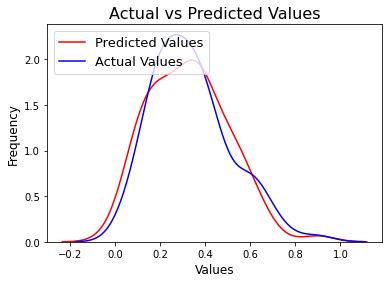

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [ ]:
hyperParameter(df)

<ipython-input-3-dbc7f8781684>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
525 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
525 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752,

{'activation': 'tanh',
 'hidden_layer_sizes': (10,),
 'max_iter': 200,
 'random_state': 216,
 'solver': 'sgd'}

In [ ]:
y = df['telomere length (kb)']
X = df.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-77-6fcfdf7c125b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1)


In [ ]:
model = MLPRegressor(hidden_layer_sizes= (10,),activation = 'tanh',solver = 'sgd',max_iter=200,random_state = 216)
model.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(10,), random_state=216,
             solver='sgd')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: -0.2085932127927559
MSE Train: 0.042577235911749944
MAE Train: 0.16014546916650146


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.7179975741044345


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: -0.13681439441196774
MSE Test: 0.03375992221017859
MAE Test: 0.14288340156174942


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


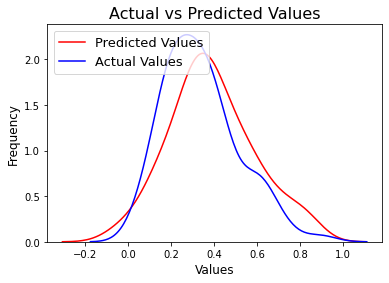

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# data2

In [ ]:
data2 = pd.read_csv(os.path.join(path,'df_2.csv'))
data2.drop('Unnamed: 0',1,inplace = True)

<ipython-input-84-9295e0cecbd9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data2.drop('Unnamed: 0',1,inplace = True)


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data2)

In [ ]:
df2 = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])
df2

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,0.099431,0.230680,...,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984,0.119472
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230,0.083010
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410,0.212956
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197,0.075640
4,1.0,1.000000,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,0.112349,0.300850,...,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557,0.012801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,0.120961,0.234903,...,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,0.461639,0.184639
418,1.0,0.179104,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,0.298434,0.346626,...,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,0.445082,0.155547
419,1.0,0.194030,0.498250,0.271818,0.700763,0.569366,0.503148,0.382581,0.237473,0.506432,...,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,0.498689,0.177269
420,0.0,0.149254,0.537579,0.565909,0.539695,0.582488,0.546296,0.554355,0.457402,0.309175,...,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,0.528689,0.182700


In [ ]:
y = df2['telomere length (kb)'].values
X = df2.drop('telomere length (kb)',1).values

<ipython-input-87-8bd2b2c93927>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1).values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
model = MLPRegressor(activation = 'relu',solver = 'adam')
model.fit(X_train, y_train)

MLPRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: 0.9133995589448729
MSE Train: 0.0030626619160042637
MAE Train: 0.04153162828591969


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.162858812480912


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.8870730942555981
MSE Test: 0.003364276747761377
MAE Test: 0.04175752503301435


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


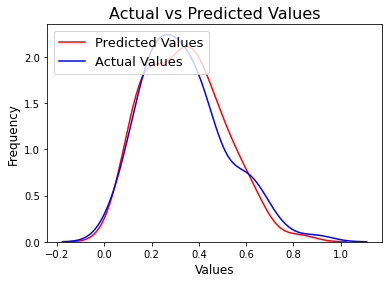

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [ ]:
hyperParameter(df2)

<ipython-input-3-dbc7f8781684>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
525 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
525 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752,

{'activation': 'tanh',
 'hidden_layer_sizes': (10,),
 'max_iter': 200,
 'random_state': 216,
 'solver': 'sgd'}

In [ ]:
y = df2['telomere length (kb)']
X = df2.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-95-a509929240d5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1)


In [ ]:
model = MLPRegressor(hidden_layer_sizes= (10,),activation = 'tanh',solver = 'sgd',max_iter=200,random_state = 216)
model.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(10,), random_state=216,
             solver='sgd')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: -0.15957909614713706
MSE Train: 0.041009014424115656
MAE Train: 0.15724119887498264


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.7331403200907083


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: -0.16538454016769633
MSE Test: 0.034718706625689384
MAE Test: 0.14691896725931095


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


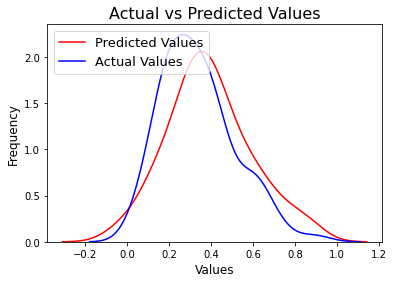

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# data control

In [ ]:
data_file_path = os.path.join(path,'data_notmissing.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data3 = pd.read_csv(data_file_path)
data3.drop({'Unnamed: 0'},1,inplace = True)

<ipython-input-31-eab412fc4bad>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data3.drop({'Unnamed: 0'},1,inplace = True)


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data3)

In [ ]:
df3 = pd.DataFrame(Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [ ]:
df3

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.660714,0.275862,0.127413,0.181818,0.284483,0.444444,0.621622,0.310345,0.085409,...,0.6,0.517241,0.409091,0.132296,0.740741,0.290909,0.118644,0.000000,0.582278,0.426230
1,1.0,0.071429,0.720159,0.239382,0.272727,0.405172,0.269841,0.459459,0.465517,0.156584,...,0.4,0.551724,0.280303,0.108949,0.370370,0.327273,0.067797,0.032258,0.430380,0.475410
2,1.0,0.750000,0.250663,0.262548,0.454545,0.267241,0.142857,0.621622,0.551724,0.167260,...,0.3,0.362069,0.818182,0.299611,0.537037,0.809091,0.152542,0.483871,0.759494,0.508197
3,1.0,0.267857,0.391247,0.299228,0.363636,0.413793,0.142857,0.135135,0.362069,0.199288,...,0.2,0.517241,0.575758,0.116732,0.666667,0.527273,0.118644,0.129032,0.240506,0.426230
4,0.0,0.464286,0.297082,0.608108,0.568182,0.698276,0.746032,0.675676,0.965517,0.437722,...,0.5,0.844828,0.545455,0.178988,0.518519,0.545455,0.101695,0.096774,0.670886,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.714286,0.202918,0.602317,0.568182,0.689655,0.714286,0.594595,0.310345,0.483986,...,0.5,0.844828,0.454545,0.630350,0.129630,0.409091,0.457627,0.483871,0.797468,0.655738
149,0.0,0.678571,0.102122,0.409266,0.522727,0.439655,0.269841,0.648649,0.362069,0.387900,...,0.6,0.827586,0.522727,0.175097,0.277778,0.636364,0.118644,0.548387,0.329114,0.704918
150,1.0,0.392857,0.689655,0.283784,0.454545,0.301724,0.253968,0.000000,0.448276,0.213523,...,0.4,0.465517,0.681818,0.198444,0.574074,0.663636,0.033898,0.000000,0.215190,0.377049
151,1.0,0.732143,0.236074,0.405405,0.318182,0.646552,0.492063,0.216216,0.362069,0.231317,...,0.4,0.534483,0.856061,0.190661,0.444444,0.945455,0.101695,0.225806,0.354430,0.475410


In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)

<ipython-input-105-2db422769c5c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
model = MLPRegressor(activation = 'relu',solver = 'adam')
model.fit(X_train, y_train)

MLPRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: -0.991038768322958
MSE Train: 0.06893305161282465
MAE Train: 0.20420536657320876


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.7701628786643191


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: -0.2665652147081783
MSE Test: 0.07959712658358047
MAE Test: 0.24638012880217305


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


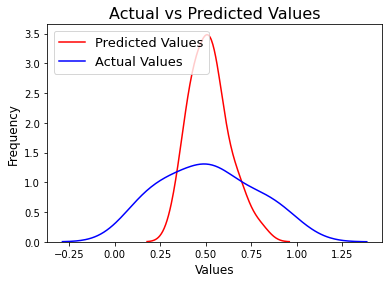

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [ ]:
hyperParameter(df3)

<ipython-input-3-dbc7f8781684>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarni

{'activation': 'tanh',
 'hidden_layer_sizes': (10,),
 'max_iter': 200,
 'random_state': 216,
 'solver': 'sgd'}

In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-113-6b97428e46c0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
model = MLPRegressor(hidden_layer_sizes= (10,),activation = 'tanh',solver = 'sgd',max_iter=200,random_state = 216)
model.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(10,), random_state=216,
             solver='sgd')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: -3.1748526503760948
MSE Train: 0.14454029615240152
MAE Train: 0.2919911091389807


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 1.2119072494346825


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: -1.7779191870640925
MSE Test: 0.17457797088059387
MAE Test: 0.34705088087687075


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


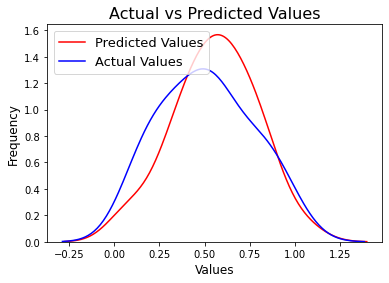

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)